In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
df = pd.read_csv("/content/single_genre_artists.csv")
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [ ]:
print(df.shape)
print(df.columns)
df.info()
df.describe()

(95837, 23)
Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy   

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [ ]:
df.isna().sum()

,0
id_songs,0
name_song,0
popularity_songs,0
duration_ms,0
explicit,0
id_artists,0
release_date,0
danceability,0
energy,0
key,0


In [ ]:
df_clean = df.drop(['id_songs', 'name_song', 'name_artists'], axis=1)

In [ ]:
# Feature Selection

features = ['danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms']

df_feat = df_clean[features]
df_feat.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_feat)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df.head()




,PC1,PC2
0,-1.676304,0.291571
1,-2.639968,-0.472803
2,-2.537328,0.474464
3,-0.677418,0.709757
4,-1.480657,1.426716


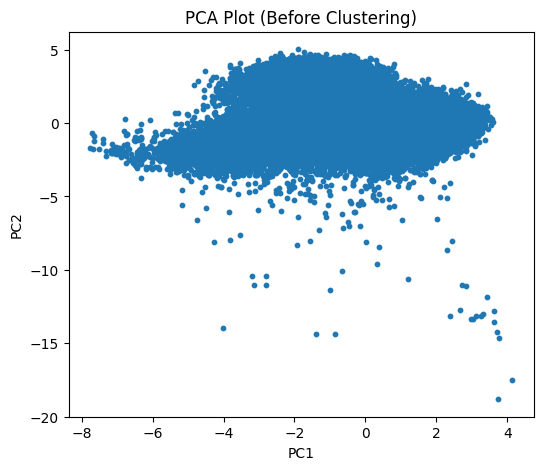

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10)
plt.title("PCA Plot (Before Clustering)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

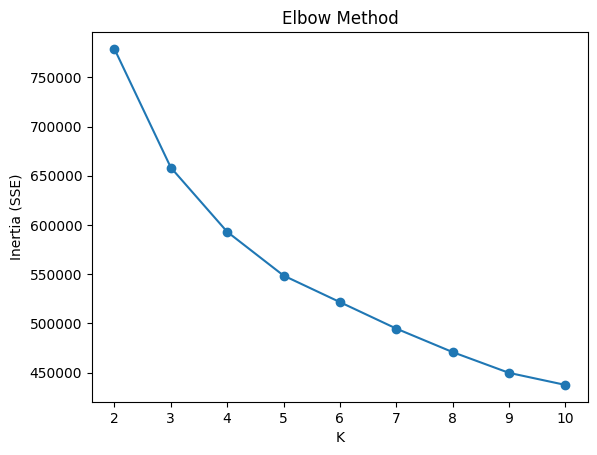

In [ ]:
# Elbow Method

inertia = []
K = range(2,11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()

In [ ]:
# Silhouette Score

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x_scaled)
  sil = silhouette_score(x_scaled, labels)
  print(f"K={k} Silhouette={sil}")

K=2 Silhouette=0.20317003588832863
K=3 Silhouette=0.2424014174066183
K=4 Silhouette=0.23106641264473726
K=5 Silhouette=0.1859687698010879
K=6 Silhouette=0.18645788196186036
K=7 Silhouette=0.16496429351963174
K=8 Silhouette=0.17213999329059596
K=9 Silhouette=0.17223407836437804
K=10 Silhouette=0.15930873372490909


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(x_scaled)

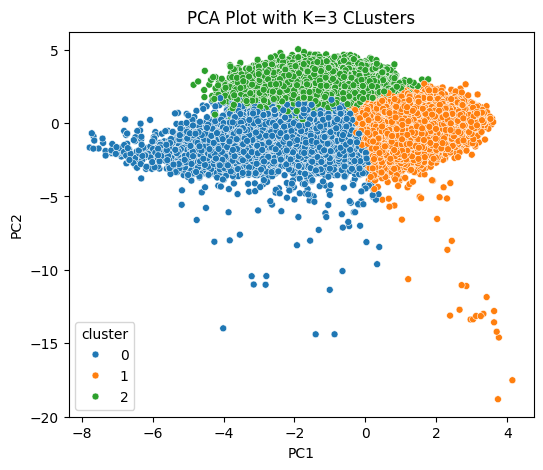

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=df['cluster'],
    palette='tab10',
    s=25
)
plt.title("PCA Plot with K=3 CLusters")
plt.show()

In [ ]:
sil_score = silhouette_score(x_scaled, df['cluster'])
sil_score

np.float64(0.2424014174066183)

In [ ]:
db_index = davies_bouldin_score(x_scaled, df['cluster'])
db_index

np.float64(1.5699416879877057)

In [ ]:
features = [
    'danceability','energy','loudness','speechiness','acousticness',
    'instrumentalness','liveness','valence','tempo','duration_ms'
]

cluster_profile = df.groupby('cluster')[features].mean()
cluster_profile

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.486242,0.311018,-13.208988,0.060103,0.749539,0.168760,0.182065,0.413047,111.933323,223500.904818
1,0.627309,0.693465,-7.608616,0.075061,0.258713,0.050681,0.199854,0.666324,124.905464,226568.204680
2,0.664254,0.466617,-13.364383,0.829908,0.585922,0.001384,0.435498,0.584036,100.387090,97522.338234


In [ ]:
scaled_df = pd.DataFrame(x_scaled, columns=features)
scaled_df['cluster'] = df['cluster']

In [ ]:
cluster_profile_scaled = scaled_df.groupby('cluster')[features].mean()
cluster_profile_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,-0.647348,-0.973605,-0.642508,-0.394785,0.879353,0.372636,-0.230593,-0.649809,-0.185707,0.125424
1,0.260296,0.644861,0.536822,-0.340473,-0.606135,-0.135363,-0.134867,0.370955,0.243973,0.151472
2,0.498008,-0.315129,-0.675231,2.400289,0.384164,-0.347449,1.133210,0.039314,-0.568156,-0.944440


<Figure size 1200x600 with 0 Axes>

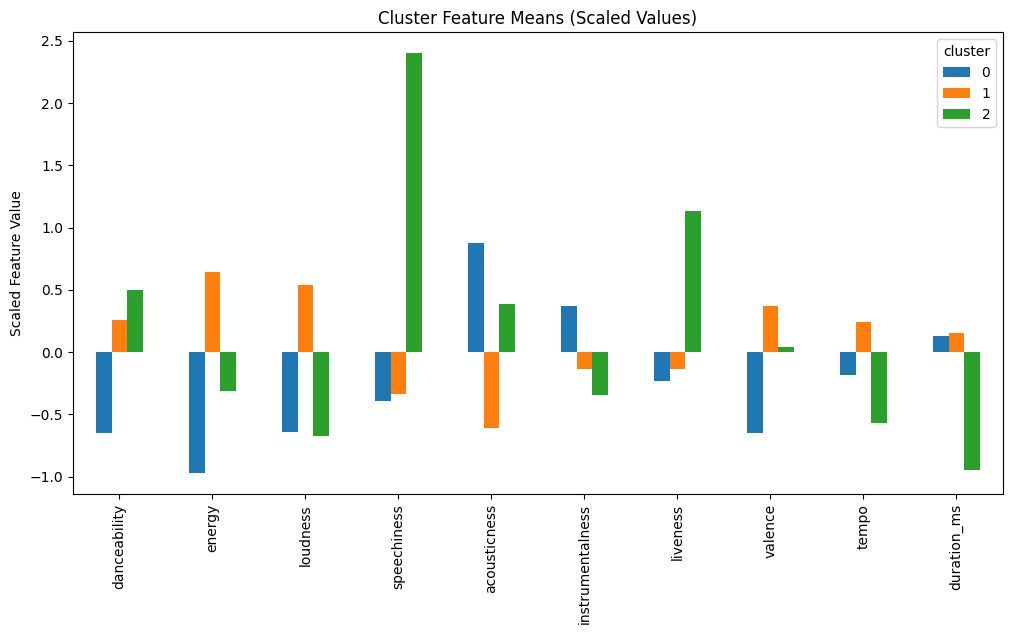

In [ ]:
plt.figure(figsize=(12,6))
cluster_profile_scaled.T.plot(kind='bar', figsize=(12,6))
plt.title("Cluster Feature Means (Scaled Values)")
plt.ylabel("Scaled Feature Value")
plt.show()

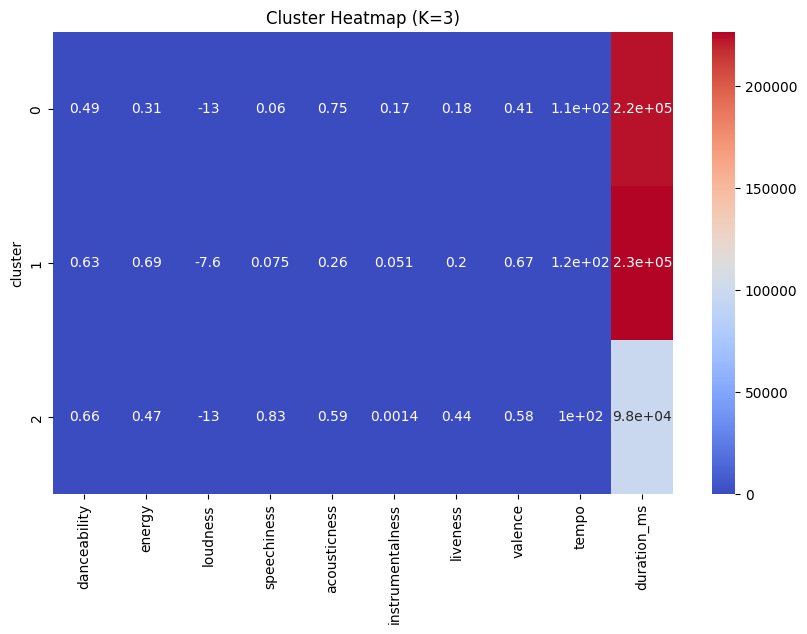

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title("Cluster Heatmap (K=3)")
plt.show()

In [ ]:
df.to_csv("final_clustered_songs.csv", index=False)

In [ ]:
cluster_profile.to_csv("cluster_profiles.csv")

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(x_scaled)
df['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,94534
-1,1169
6,51
9,8
12,8
4,7
3,7
2,6
15,6


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Define df (from cell HaJBBykKi4d9)
df = pd.read_csv("/content/single_genre_artists.csv")

# Define df_clean (from cell Q34m4RrYkbuo)
df_clean = df.drop(['id_songs', 'name_song', 'name_artists'], axis=1)

# Define features and df_feat (from cell Q7yD_WADk5fE)
features = ['danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms']
df_feat = df_clean[features]

# Scale features (from cell 2QVnZCezlVSj)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_feat)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(x_scaled)

df['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
-1,90249
11,3523
17,706
33,94
0,43
...,...
22,5
63,5
86,4


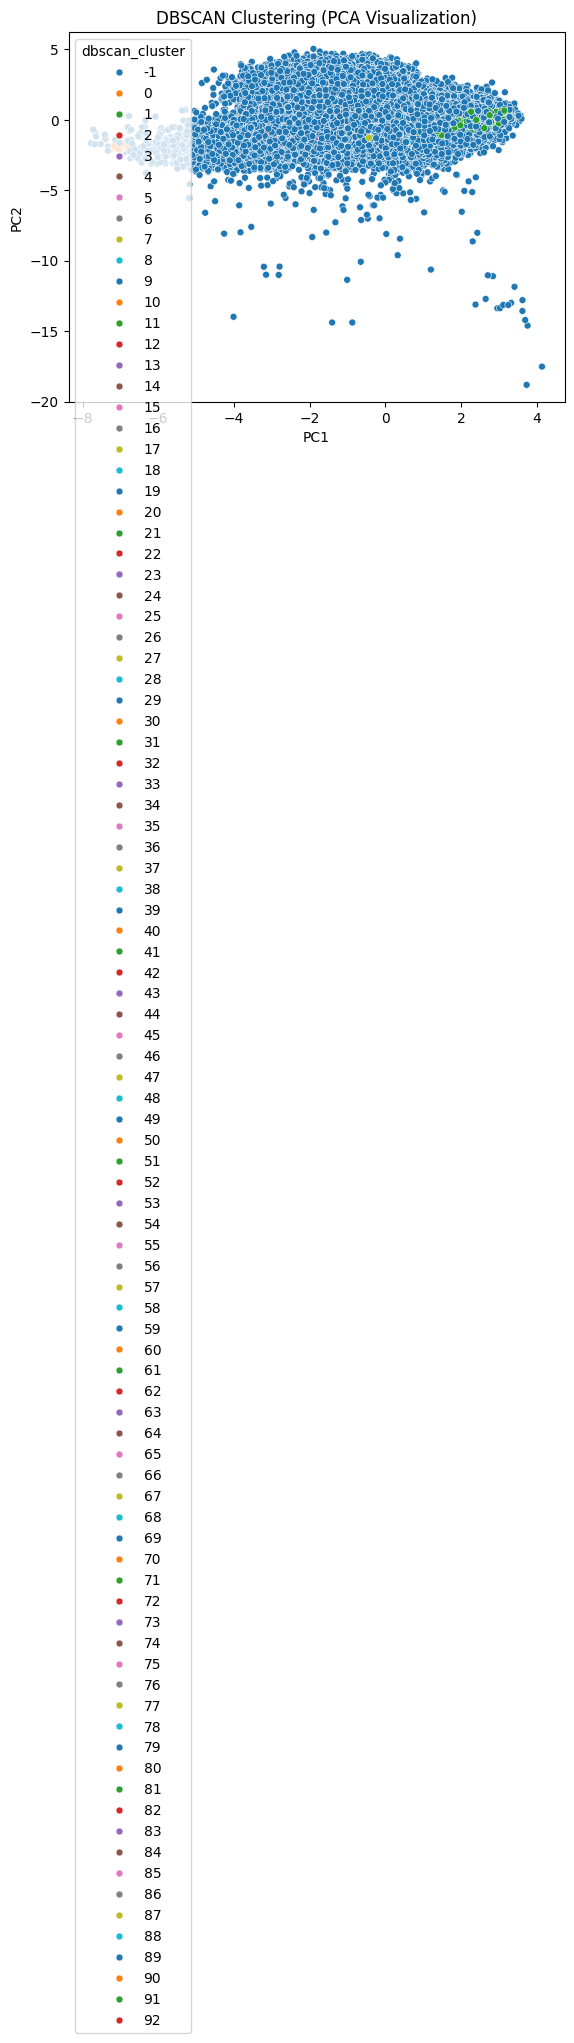

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=df['dbscan_cluster'],
    palette='tab10',
    s=25
)
plt.title("DBSCAN Clustering (PCA Visualization)")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = [0.5, 1.0, 1.5, 2.0, 3.0]

for e in eps_values:
    db = DBSCAN(eps=e, min_samples=10).fit(x_scaled)
    labels, counts = np.unique(db.labels_, return_counts=True)
    print(f"eps={e} → clusters={len(labels)}  labels={labels} counts={counts}")

eps=0.5 → clusters=94  labels=[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92] counts=[90249    43    10    10    25    10    13    13    40    11     6    10
  3523    32    10    12    43    37   706    19    11    16     9     5
    10     9    33    11    14    10    37    14    10    23    94    11
    36    15     9    10     9    21    12     9    26    16    15    28
    10    10    10    16    10    10    35    16    22     9    18    11
     8     6    16    15     5     9     9    13     9     8    17    10
     9     3    10    10    10    10     9     8    10     6    10     8
    10     8    12     4     9     8    11     4     9    12]
eps=1.0 → clusters=21  labels=[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] counts=[

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/single_genre_artists.csv")
df_clean = df.drop(['id_songs', 'name_song', 'name_artists'], axis=1)
features = ['danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms']
df_feat = df_clean[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_feat)

dbscan = DBSCAN(eps=2.0, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(x_scaled)
df['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,95336
-1,425
1,54
2,12
3,10


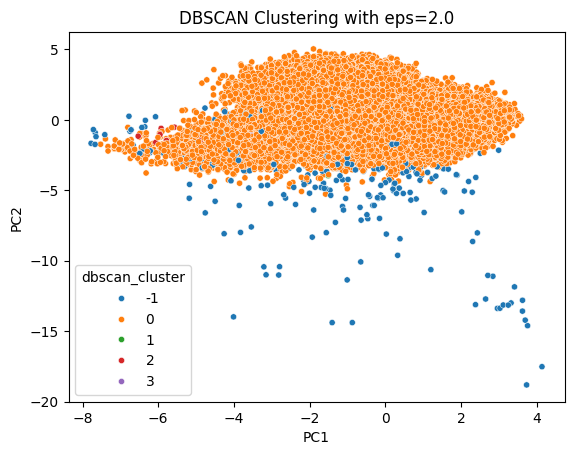

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Redefine df, df_clean, df_feat, and x_scaled to ensure cell independence
df = pd.read_csv("/content/single_genre_artists.csv")
df_clean = df.drop(['id_songs', 'name_song', 'name_artists'], axis=1)
features = ['danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms']
df_feat = df_clean[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_feat)

# Perform DBSCAN clustering (assuming parameters are already chosen)
dbscan = DBSCAN(eps=2.0, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(x_scaled)

# Re-create pca_df in this cell
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

sns.scatterplot(
    x=pca_df['PC1'], y=pca_df['PC2'],
    hue=df['dbscan_cluster'], palette='tab10', s=20
)
plt.title("DBSCAN Clustering with eps=2.0")
plt.show()

In [ ]:
from google.colab import files
files.download("final_clustered_songs.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/cluster_profiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/single_genre_artists.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>